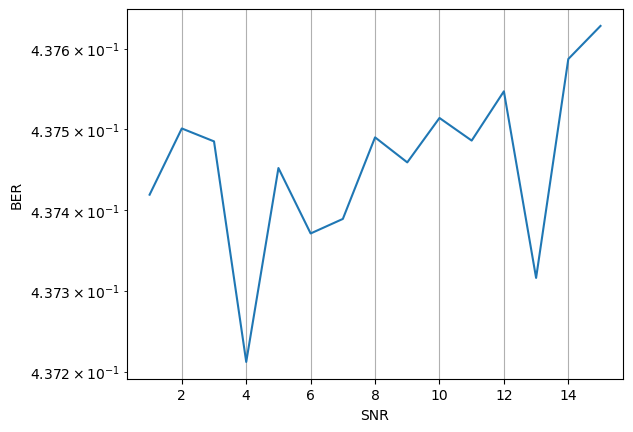

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Rb = 1000000
N = 50
A = 1
Eb = A**2 / Rb

info = np.random.randint(0, 2, Rb)

info_up = np.repeat(info, N)

filtro_tx = np.ones(N)

s_t = signal.lfilter(filtro_tx, 1, info_up)

SNR = np.arange(1, 16)

BER = np.zeros(len(SNR))
for i in SNR:
    N_0 = Eb / 10 ** (i / 10)
    r_t = np.sqrt(N_0 / 2) * np.random.normal(0, 1, len(s_t)) + s_t

    filtro_rx = np.ones(N)
    r_t_filter = signal.lfilter(filtro_rx, 1, r_t)

    z_t = r_t_filter[::N]

    limiar = 0
    info_hat = (z_t > limiar).astype(int)

    erro = np.sum(np.bitwise_xor(info, info_hat))
    BER[i - 1] = erro / len(info)

plt.figure()
plt.semilogy(SNR, BER)
plt.xlabel("SNR")
plt.ylabel("BER")
plt.grid()
plt.show()